In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import SimpleRNN, Dense, LSTM, GRU
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import Sequential

data = pd.read_csv(r'C:\Users\91701\Documents\trimester 3\deep learning\3\yahoo_data.csv')
data.head()


,Date,Open,High,Low,Close*,Adj Close**,Volume
0,Apr 28 2023,33797.43,34104.56,33728.40,34098.16,34098.16,354310000
1,Apr 27 2023,33381.66,33859.75,33374.65,33826.16,33826.16,343240000
2,Apr 26 2023,33596.34,33645.83,33235.85,33301.87,33301.87,321170000
3,Apr 25 2023,33828.34,33875.49,33525.39,33530.83,33530.83,297880000
4,Apr 24 2023,33805.04,33891.15,33726.09,33875.40,33875.40,252020000


In [44]:
# Splitting dataset into testing and training data sets
prices = data['Close*'].values.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
priceScaled = scaler.fit_transform(prices)

window = 100
trainSize = int(len(priceScaled) * 0.8)
trainData = priceScaled[:trainSize]
testData = priceScaled[trainSize - window:]

Epoch 1/20
29/29 [==============================] - 3s 27ms/step - loss: 0.2024
Epoch 2/20
29/29 [==============================] - 1s 25ms/step - loss: 0.0046
Epoch 3/20
29/29 [==============================] - 1s 26ms/step - loss: 0.0018
Epoch 4/20
29/29 [==============================] - 1s 25ms/step - loss: 9.4419e-04
Epoch 5/20
29/29 [==============================] - 1s 26ms/step - loss: 7.0884e-04
Epoch 6/20
29/29 [==============================] - 1s 26ms/step - loss: 7.3540e-04
Epoch 7/20
29/29 [==============================] - 1s 27ms/step - loss: 7.2371e-04
Epoch 8/20
29/29 [==============================] - 1s 27ms/step - loss: 6.8983e-04
Epoch 9/20
29/29 [==============================] - 1s 26ms/step - loss: 6.7104e-04
Epoch 10/20
29/29 [==============================] - 1s 27ms/step - loss: 6.6041e-04
Epoch 11/20
29/29 [==============================] - 1s 30ms/step - loss: 6.5232e-04
Epoch 12/20
29/29 [==============================] - 1s 29ms/step - loss: 6.9386e-04
E

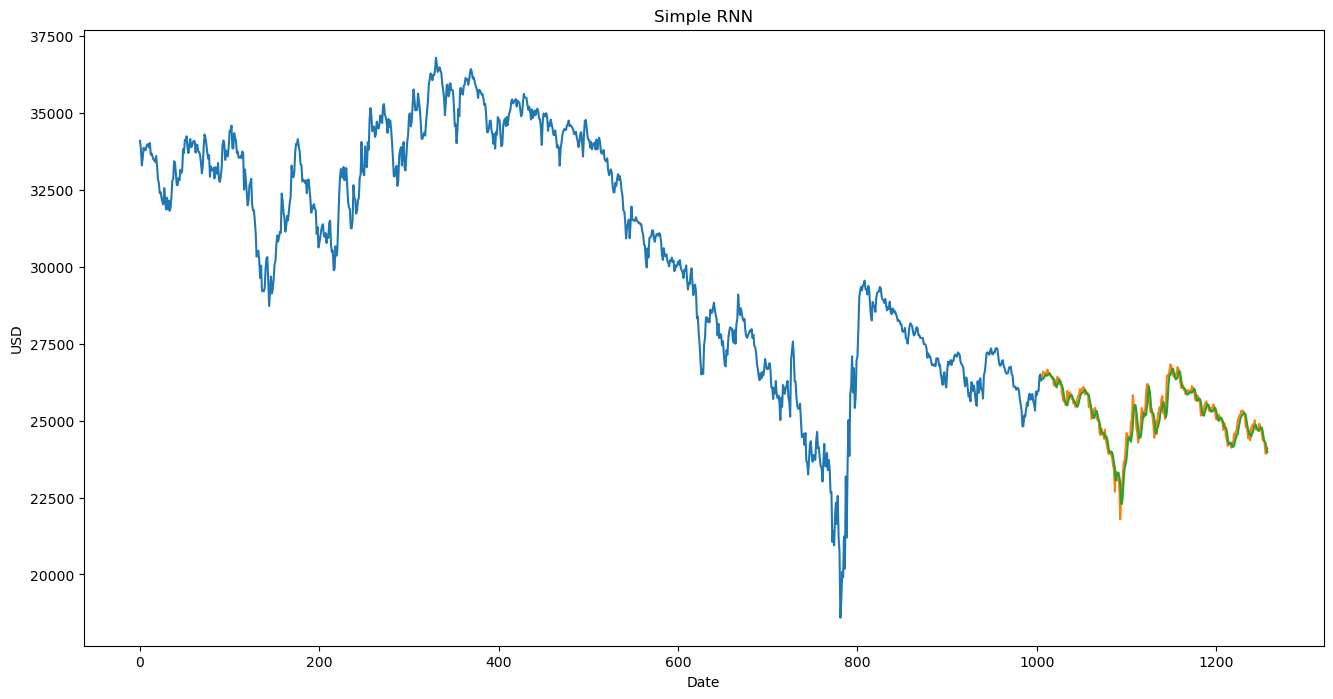

In [54]:
# Simple RNN
xRNNtrain, yRNNtrain = [], []

for i in range(len(trainData) - window):
    xRNNtrain.append(trainData[i:i + window, 0])
    yRNNtrain.append(trainData[i + window, 0])

xRNNtrain, yRNNtrain = np.array(xRNNtrain), np.array(yRNNtrain)
xRNNtrain = np.reshape(xRNNtrain, (xRNNtrain.shape[0], xRNNtrain.shape[1], 1))

xRNNtest, yRNNtest = [], []

for i in range(len(testData) - window):
    xRNNtest.append(testData[i:i + window, 0])
    yRNNtest.append(testData[i + window, 0])

xRNNtest, yRNNtest = np.array(xRNNtest), np.array(yRNNtest)
xRNNtest = np.reshape(xRNNtest, (xRNNtest.shape[0], xRNNtest.shape[1], 1))

modelRNN = Sequential()
modelRNN.add(SimpleRNN(units = 50, activation = 'relu', input_shape = (window, 1)))
modelRNN.add(Dense(units = 1))
modelRNN.compile(optimizer = 'adam', loss = 'mean_squared_error')
modelRNN.fit(xRNNtrain, yRNNtrain, epochs = 20, batch_size = 32)

predictionScaledRNN = modelRNN.predict(xRNNtest)
predictionsRNN = scaler.inverse_transform(predictionScaledRNN)

plt.figure(figsize=(16, 8))
plt.title('Simple RNN')
plt.xlabel('Date')
plt.ylabel('USD')
plt.plot(data[:trainSize]['Close*'], label = 'Training Data')
plt.plot(data[trainSize:].index, data[trainSize:]['Close*'], label = 'Actual Price')
plt.plot(data[trainSize:].index, predictionsRNN, label = 'Predicted Price')
plt.show()

In [75]:
maeRNN = mean_absolute_error(scaler.inverse_transform(yRNNtest.reshape(-1, 1)), predictionsRNN)
rmseRNN = np.sqrt(mean_squared_error(scaler.inverse_transform(yRNNtest.reshape(-1, 1)), predictionsRNN))
r2RNN = r2_score(scaler.inverse_transform(yRNNtest.reshape(-1, 1)), predictionsRNN)

print("RNN Metrics")
print(f"MAE Score: {maeRNN} ")
print(f"RMSE Score: {rmseRNN}")
print(f"R2 Score: {r2RNN}")

RNN Metrics
MAE Score: 204.3650641741071 
RMSE Score: 280.29632978335496
R2 Score: 0.9011495529706255


8/8 [==============================] - 1s 18ms/step


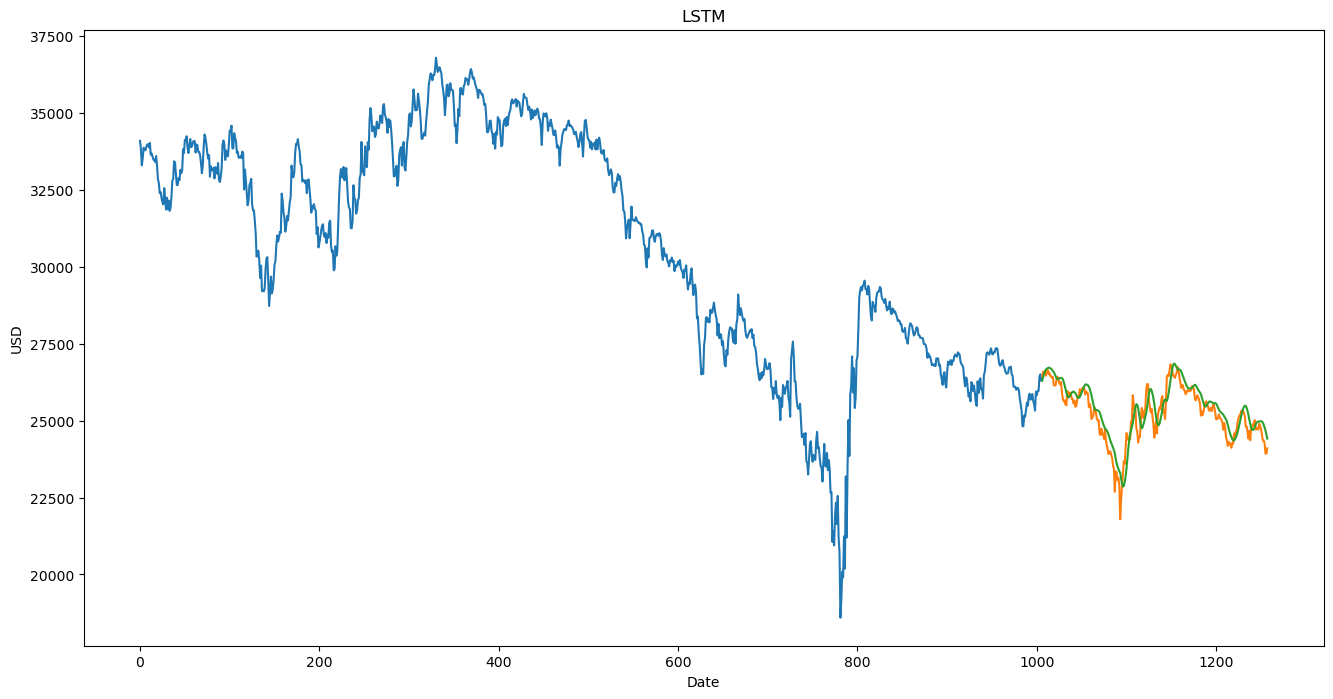

In [73]:
# LSTM
xLSTMtrain, yLSTMtrain = [], []

for i in range(len(trainData) - window):
    xLSTMtrain.append(trainData[i:i + window, 0])
    yLSTMtrain.append(trainData[i + window, 0])      

xLSTMtrain, yLSTMtrain = np.array(xLSTMtrain), np.array(yLSTMtrain)
xLSTMtrain = np.reshape(xLSTMtrain, (xLSTMtrain.shape[0], xLSTMtrain.shape[1], 1))

xLSTMtest, yLSTMtest = [], []

for i in range(len(testData) - window):
    xLSTMtest.append(testData[i:i + window, 0])
    yLSTMtest.append(testData[i + window, 0])      

xLSTMtest, yLSTMtest = np.array(xLSTMtest), np.array(yLSTMtest)

xLSTMtest = np.reshape(xLSTMtest, (xLSTMtest.shape[0], xLSTMtest.shape[1], 1))

modelLSTM = Sequential()
modelLSTM.add(LSTM(128, return_sequences = True, input_shape = (xLSTMtrain.shape[1], 1)))
modelLSTM.add(LSTM(64, return_sequences = False))
modelLSTM.add(Dense(1))
modelLSTM.compile(optimizer = 'adam', loss = 'mean_squared_error')
modelLSTM.fit(xLSTMtrain, yLSTMtrain, batch_size = 1, epochs = 1)

predictionsLSTM = modelLSTM.predict(xLSTMtest)
predictionsLSTM = scaler.inverse_transform(predictionsLSTM)

plt.figure(figsize=(16, 8))
plt.title('LSTM')
plt.xlabel('Date')
plt.ylabel('USD')
plt.plot(data[:trainSize]['Close*'], label = 'Training Data')
plt.plot(data[trainSize:].index, data[trainSize:]['Close*'], label = 'Actual Price')
plt.plot(data[trainSize:].index, predictionsLSTM, label = 'Predicted Price')
plt.show()

In [74]:
maeLSTM = mean_absolute_error(scaler.inverse_transform(yLSTMtest.reshape(-1, 1)), predictionsLSTM)
rmseLSTM = np.sqrt(mean_squared_error(scaler.inverse_transform(yLSTMtest.reshape(-1, 1)), predictionsLSTM))
r2LSTM = r2_score(scaler.inverse_transform(yLSTMtest.reshape(-1, 1)), predictionsLSTM)

print("LSTM Metrics")
print(f"MAE Score: {maeLSTM} ")
print(f"RMSE Score: {rmseLSTM}")
print(f"R2 Score: {r2LSTM}")

LSTM Metrics
MAE Score: 350.10854259672624 
RMSE Score: 430.93844302039764
R2 Score: 0.7663454234678615


Epoch 1/20
26/26 [==============================] - 6s 91ms/step - loss: 0.3659 - val_loss: 0.0251
Epoch 2/20
26/26 [==============================] - 2s 67ms/step - loss: 0.0474 - val_loss: 0.0326
Epoch 3/20
26/26 [==============================] - 2s 67ms/step - loss: 0.0092 - val_loss: 0.0140
Epoch 4/20
26/26 [==============================] - 2s 69ms/step - loss: 0.0059 - val_loss: 0.0081
Epoch 5/20
26/26 [==============================] - 2s 71ms/step - loss: 0.0033 - val_loss: 0.0027
Epoch 6/20
26/26 [==============================] - 2s 71ms/step - loss: 0.0015 - val_loss: 5.6917e-04
Epoch 7/20
26/26 [==============================] - 2s 68ms/step - loss: 0.0010 - val_loss: 3.4313e-04
Epoch 8/20
26/26 [==============================] - 2s 70ms/step - loss: 9.5385e-04 - val_loss: 3.1888e-04
Epoch 9/20
26/26 [==============================] - 2s 68ms/step - loss: 9.4342e-04 - val_loss: 2.8744e-04
Epoch 10/20
26/26 [==============================] - 2s 70ms/step - loss: 9.0581e-04 

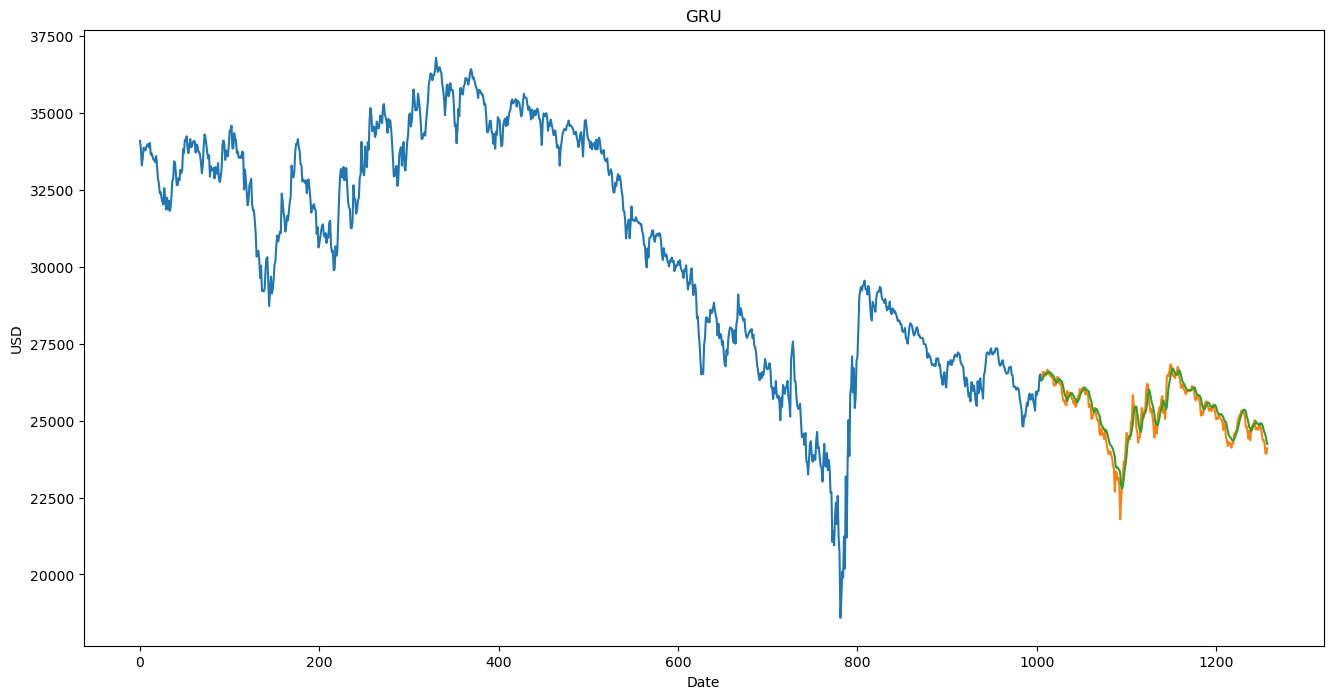

In [65]:
# GRU
xGRUtrain, yGRUtrain = [], []

for i in range(len(trainData) - window):
    xGRUtrain.append(trainData[i:i + window, 0])
    yGRUtrain.append(trainData[i + window, 0])      

xGRUtrain, yGRUtrain = np.array(xGRUtrain), np.array(yGRUtrain)
xGRUtrain = np.reshape(xGRUtrain, (xGRUtrain.shape[0], xGRUtrain.shape[1], 1))

xGRUtest, yGRUtest = [], []

for i in range(len(testData) - window):
    xGRUtest.append(testData[i:i + window, 0])
    yGRUtest.append(testData[i + window, 0])      

xGRUtest, yGRUtest = np.array(xGRUtest), np.array(yGRUtest)
xGRUtest = np.reshape(xGRUtest, (xGRUtest.shape[0], xGRUtest.shape[1], 1))

modelGRU = Sequential()
modelGRU.add(GRU(units = 50, activation = 'relu', input_shape = (window, 1)))
modelGRU.add(Dense(units = 1))
modelGRU.compile(optimizer = 'adam', loss = 'mean_squared_error')
modelGRU.fit(xGRUtrain, yGRUtrain, epochs = 20, batch_size = 32, validation_split = 0.1)

predictionsGRU = modelGRU.predict(xGRUtest)
predictionsGRU = scaler.inverse_transform(predictionsGRU)

plt.figure(figsize=(16, 8))
plt.title('GRU')
plt.xlabel('Date')
plt.ylabel('USD')
plt.plot(data[:trainSize]['Close*'], label = 'Training Data')
plt.plot(data[trainSize:].index, data[trainSize:]['Close*'], label = 'Actual Price')
plt.plot(data[trainSize:].index, predictionsGRU, label = 'Predicted Price')
plt.show()

In [69]:
maeGRU = mean_absolute_error(scaler.inverse_transform(yGRUtest.reshape(-1, 1)), predictionsGRU)
rmseGRU = np.sqrt(mean_squared_error(scaler.inverse_transform(yGRUtest.reshape(-1, 1)), predictionsGRU))
r2GRU = r2_score(scaler.inverse_transform(yGRUtest.reshape(-1, 1)), predictionsGRU)

print("GRU Metrics")
print(f"MAE Score: {maeGRU} ")
print(f"RMSE Score: {rmseGRU}")
print(f"R2 Score: {r2GRU}")

GRU Metrics
MAE Score: 246.5031618923611 
RMSE Score: 321.00809691018634
R2 Score: 0.8703490243555656


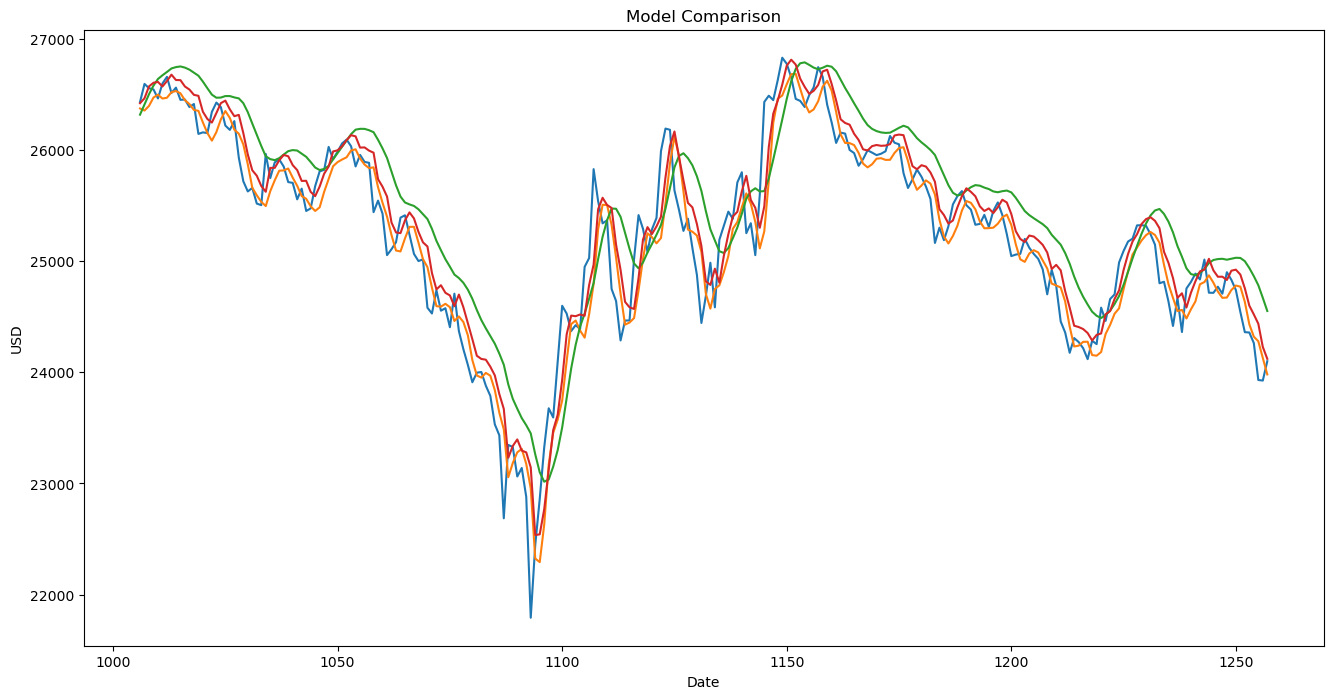

In [56]:
# Model comparison
plt.figure(figsize=(16, 8))
plt.title('Model Comparison')
plt.xlabel('Date')
plt.ylabel('USD')
plt.plot(data[trainSize:].index, data[trainSize:]['Close*'], label = 'Actual Price')
plt.plot(data[trainSize:].index, predictionsRNN, label = 'RNN Predicted Price')
plt.plot(data[trainSize:].index, predictionsLSTM, label = 'LSTM Predicted Price')
plt.plot(data[trainSize:].index, predictionsGRU, label = 'GRU Predicted Price')
plt.show()